# Naive Bayes


## Introduction to Naive Bayes

Bayes Theorem is a mathematical theorem used for predicting a future outcome depending on a collected piece of evidence. More specifically, this theorem calculates "conditional probabilities", which depicts the probability of an outcome based on a prior condition/ event. The formula for the theorem is:

[P(A|B) = (P(B|A) (P(A))) / P(B)]

In this formula, to predict the probability of event A given event B, we multiply the probability of event B when event A occurs by the probability of event A. We then divide the product by the total probability of event B. With that in mind, Naive Bayes Classifier will be looking at how to classify a data set based on a target variable being given.

There are many variants under the umbrella of Naive Bayes. Included in this bunch are Complement Naive Bayes, Out- of- core Naive Bayes model- fitting, Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes. When speaking of Gaussian Naive Bayes, this is used for normal distribution expectancies in data. Whereas, Bernoulli Naive Bayes is used for binary variables when classifying. Likewise, Multinomial Naive Bayes is used for multiple variables. 

I will be using the Multinomial Bayes Classifier to examine how my text data is classified into positive, negative, and neutral sentiments.
I will be using the Multinomial Bayes Classifier again to discern how my self- reporting life satisfaction data is classified.


### Text

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

In [49]:
#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "../websitedata/naiveText"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

teledf = pd.read_csv("../websitedata/television.csv")

teledf["sentiment"] = teledf["compound"].apply(lambda x: "Pos" if x > 0.5 else "Neg" if x < 0.0 else "Neu")
teledf = teledf.dropna()
#print(teledf.isna().sum())
print(teledf)

     Unnamed: 0        Word  neg  neu  pos  compound sentiment
0             0          in  0.0  1.0  0.0    0.0000       Neu
1             1      summer  0.0  1.0  0.0    0.0000       Neu
2             2       1985,  0.0  1.0  0.0    0.0000       Neu
3             3    hawkins,  0.0  1.0  0.0    0.0000       Neu
4             4       newly  0.0  1.0  0.0    0.0000       Neu
..          ...         ...  ...  ...  ...       ...       ...
305          26       love,  0.0  0.0  1.0    0.6369       Pos
306          27  surrounded  0.0  1.0  0.0    0.0000       Neu
307          28     friends  0.0  0.0  1.0    0.4767       Neu
308          29      rivals  0.0  1.0  0.0    0.0000       Neu
309          30      alike.  0.0  1.0  0.0    0.0000       Neu

[310 rows x 7 columns]


In [50]:
# use count vectorizer to retrieve one-hot encodings

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df = 2)

corpus = teledf["Word"].to_list() 

# CLEAN UP
tmp=[]
for word in corpus:
    tmp1=word.replace(",","")
    tmp1=tmp1.replace(".","")
    #print(tmp1)
    tmp.append(tmp1)
    
corpus=tmp
print(corpus)
print(len(corpus))

['in', 'summer', '1985', 'hawkins', 'newly', 'opened', 'starcourt', 'mall', 'become', 'center', 'attention', 'town', 'causing', 'stores', 'close', 'business', 'due', 'popularity', 'jim', 'hopper', 'disapproves', 'mike', 'wheeler', 'relationship', 'daughter', 'eleven', 'prompting', 'intervene', 'relationship', 'leading', 'eleven', 'friendship', 'max', 'mayfield', 'still', 'recovering', 'bob', 'newby', 'death', 'joyce', 'byers', 'considers', 'moving', 'hawkins', 'children', 'however', 'magnetic', 'disruptions', 'lead', 'believe', 'upside', 'down', 'returned', 'enlists', 'hopper', 'help', 'uncovering', 'truth', 'while', 'mike', 'lucas', 'sinclair', 'attempt', 'repair', 'relationship', 'eleven', 'will', 'byers', 'begins', 'experiencing', 'premonitions', 'upside', 'down', 'despite', 'eleven', 'closing', 'original', 'gate', 'led', 'disappearance', 'he', 'believes', 'mind', 'flayer', 'still', 'alive', 'back', 'hawkins', 'as', 'nancy', 'wheeler', 'jonathan', 'byers', 'investigate', 'effects', 

In [51]:
# print(teledf["sentiment"])
y = np.array((teledf["sentiment"]=="Pos").astype(int))
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
(310,)


In [52]:
# use count vectorizer to retrieve one-hot encodings
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df = 1)
Xs = count_vectorizer.fit_transform(corpus)   
# print(Xs)
print(count_vectorizer.vocabulary_)
x = np.array(Xs.todense())
print(x)

{'in': 120, 'summer': 228, '1985': 2, 'hawkins': 110, 'newly': 172, 'opened': 180, 'starcourt': 221, 'mall': 151, 'become': 27, 'center': 44, 'attention': 21, 'town': 235, 'causing': 43, 'stores': 226, 'close': 49, 'business': 40, 'due': 73, 'popularity': 188, 'jim': 134, 'hopper': 117, 'disapproves': 69, 'mike': 156, 'wheeler': 250, 'relationship': 200, 'daughter': 60, 'eleven': 77, 'prompting': 195, 'intervene': 128, 'leading': 141, 'friendship': 101, 'max': 153, 'mayfield': 154, 'still': 225, 'recovering': 196, 'bob': 34, 'newby': 170, 'death': 62, 'joyce': 136, 'byers': 41, 'considers': 52, 'moving': 161, 'children': 45, 'however': 118, 'magnetic': 150, 'disruptions': 70, 'lead': 140, 'believe': 30, 'upside': 244, 'down': 71, 'returned': 203, 'enlists': 80, 'help': 113, 'uncovering': 242, 'truth': 239, 'while': 252, 'lucas': 149, 'sinclair': 216, 'attempt': 20, 'repair': 201, 'will': 253, 'begins': 29, 'experiencing': 87, 'premonitions': 193, 'despite': 65, 'closing': 50, 'original

In [53]:
import random

N=x.shape[0]; #print("N=",N)
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])
print(N)

[172, 100, 107, 197, 0, 190, 91, 185, 122, 63]
[6, 105, 293, 59, 131, 161, 108, 66, 71, 38]
310


In [54]:
# FEATURE SELECTION

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(x, y, train_index, test_index, i_print=False):
    if i_print:
        print(x.shape, y.shape)

    # Split the data using indices
    x_train = x[train_index]
    y_train = y[train_index].flatten()

    x_test = x[test_index]
    y_test = y[test_index].flatten()

    # Initialize model
    model = MultinomialNB()

    # Train model
    start = time.process_time()
    model.fit(x_train, y_train)
    time_train = time.process_time() - start

    # Label predictions for training and test set
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if i_print:
        print(acc_train, acc_test, time_train, time_eval)

    return acc_train, acc_test, time_train, time_eval


# Test
(acc_train, acc_test, time_train, time_eval) = train_MNB_model(x, y, train_index, test_index, i_print=True)

(310, 258) (310,)
99.59677419354838 98.38709677419355 0.0 0.0


In [55]:
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0032154006243496364
0.015868886576482784


In [56]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [57]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [58]:
# UTILITY FUNCTION TO PLOT RESULTS

def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

In [59]:
from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=10
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,train_index, test_index, i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

THRESHOLD = 0.004621343507919986 33
THRESHOLD = 0.006027286391490336 33
THRESHOLD = 0.0074332292750606856 9
THRESHOLD = 0.008839172158631035 9
THRESHOLD = 0.010245115042201386 5
THRESHOLD = 0.011651057925771735 5
THRESHOLD = 0.013057000809342086 5


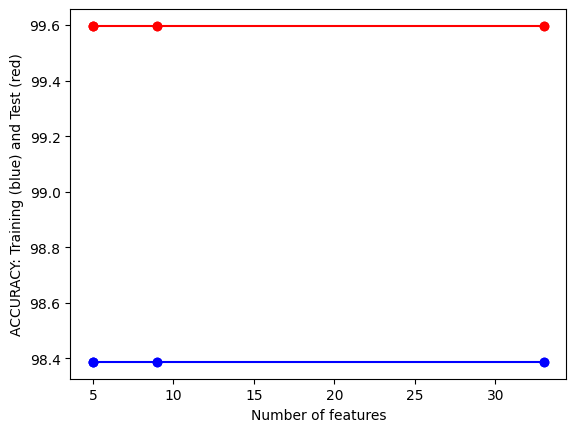

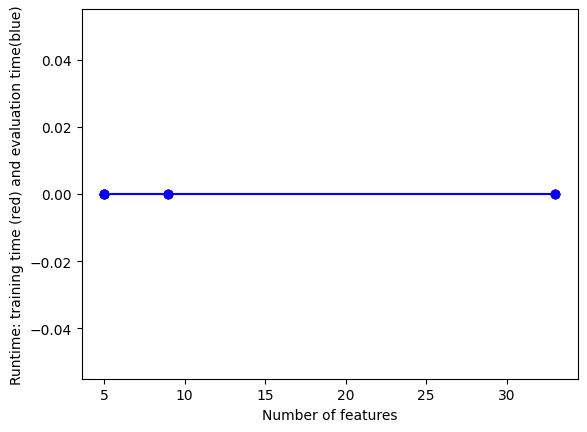

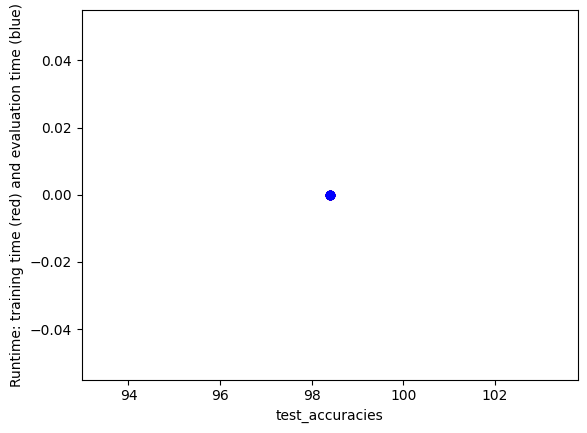

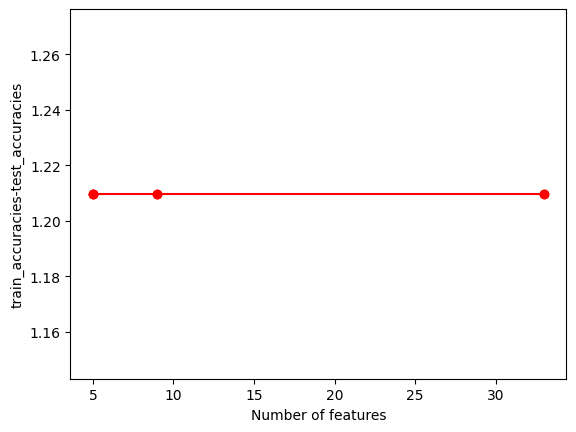

In [60]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

### Record

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil
import requests
import json
import re
#import pycountry
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

In [62]:
output_dir = output_dir = "../websitedata/naiveOutput"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

happygdp = pd.read_csv("../websitedata/happy_py.csv")

happygdp["GDP"] = happygdp["GDP"].str.replace(',', '').astype(float)

happygdp = happygdp.rename(columns={"Unnamed: 0": "Country"})

# Score Categories: 0-4.0 = "Low"; 4.1 - 7.0 = "Moderate"; 7.1 & above = "High" 
happygdp["Happiness"] = pd.cut(happygdp["Score"], bins=[0, 4.0, 7.0, 10], 
                     labels=["Low", "Moderate", "High"])

Happydf = happygdp.drop(["Score", "Happiness", "Entity", "Code"], axis=1)

print(Happydf)

     Country      GDP
0          1    363.7
1        597   6802.8
2        857   4273.9
3       2133  13686.0
4       2393   7014.2
..       ...      ...
132    56105   2255.2
133    56816  15975.7
134    57076   4163.5
135    58181   1487.9
136    58442   1267.0

[137 rows x 2 columns]


In [63]:
x = Happydf.to_numpy()

y = happygdp["Happiness"]
y=np.array(y)

print(x.shape, y.shape)

(137, 2) (137,)


In [64]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[118, 54, 0, 39, 68, 103, 93, 1, 61, 100]
[85, 67, 87, 43, 2, 97, 108, 14, 25, 33]


In [65]:

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(137, 2) (137,)
(137, 2) (137,)
41.284403669724774 60.71428571428571 0.0 0.0


In [66]:
# FEATURE SELECTION FOR RECORD DATA

from sklearn.feature_selection import VarianceThreshold

##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]
    
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

267473890.76700944
595615971.6199687
THRESHOLD = 278789134.9343529 1
THRESHOLD = 290104379.10169625 1
THRESHOLD = 301419623.2690397 1
THRESHOLD = 312734867.4363831 1
THRESHOLD = 324050111.60372657 1
THRESHOLD = 335365355.77106994 1
THRESHOLD = 346680599.9384134 1
THRESHOLD = 357995844.1057568 1
THRESHOLD = 369311088.27310026 1
THRESHOLD = 380626332.44044363 1
THRESHOLD = 391941576.6077871 1
THRESHOLD = 403256820.7751305 1
THRESHOLD = 414572064.9424739 1
THRESHOLD = 425887309.1098173 1
THRESHOLD = 437202553.27716076 1
THRESHOLD = 448517797.44450414 1
THRESHOLD = 459833041.6118476 1
THRESHOLD = 471148285.779191 1
THRESHOLD = 482463529.9465344 1
THRESHOLD = 493778774.1138779 1
THRESHOLD = 505094018.2812213 1
THRESHOLD = 516409262.4485647 1
THRESHOLD = 527724506.61590815 1
THRESHOLD = 539039750.7832515 1
THRESHOLD = 550354994.9505949 1
THRESHOLD = 561670239.1179384 1
THRESHOLD = 572985483.2852818 1


In [67]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [68]:
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

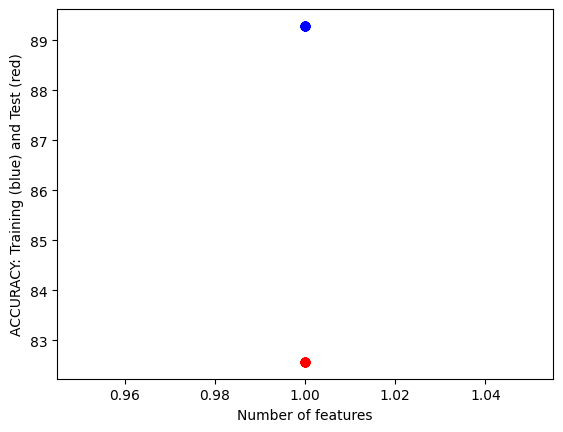

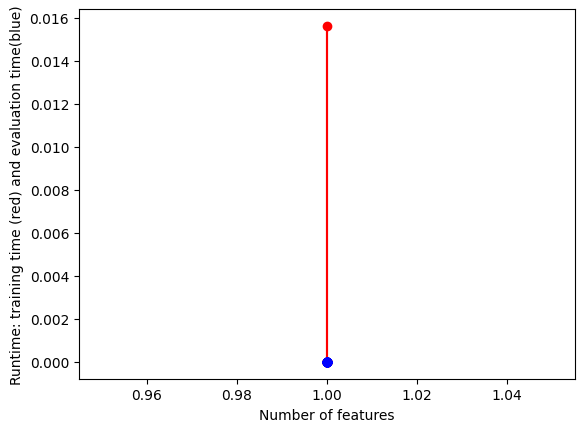

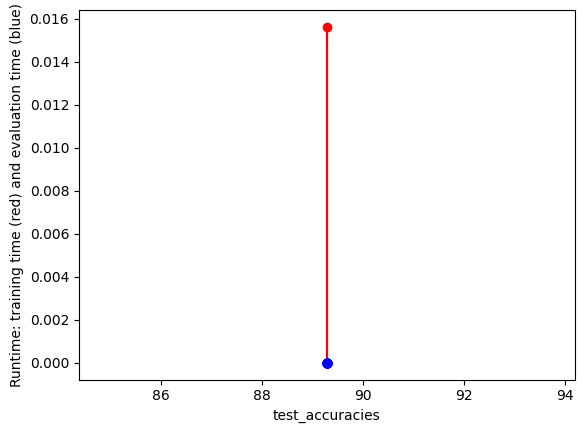

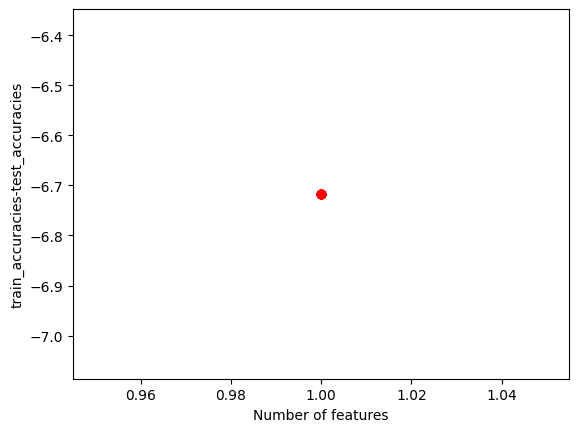

In [69]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

Since my text and record data didn’t have many variables, the hyperparameter tuning was not as useful. Due to my data’s size, the data is also subject to overfitting.